In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# 生成虚拟数据集
np.random.seed(0)
data_size = 1000
X = np.random.rand(data_size, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # 设定一个简单的规则作为目标变量
print(X.shape, X)
print(y.shape)

(1000, 2) [[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 ...
 [0.41443887 0.79128155]
 [0.72119811 0.48010781]
 [0.64386404 0.50177313]]
(1000,)


In [6]:
# 创建DataFrame
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Target'] = y

In [7]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(700, 2) (300, 2)
(700,) (300,)


In [8]:
# 训练决策树
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [10]:
# 预测
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('y_pred:', y_pred)
print('Accuracy:', accuracy)

y_pred: [0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0
 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1
 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0
 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0
 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1
 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1
 1 1 1 1]
Accuracy: 0.9233333333333333


In [13]:
# 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[146   8]
 [ 15 131]]


Text(0.5, 1.0, 'Decision Tree Visualization')

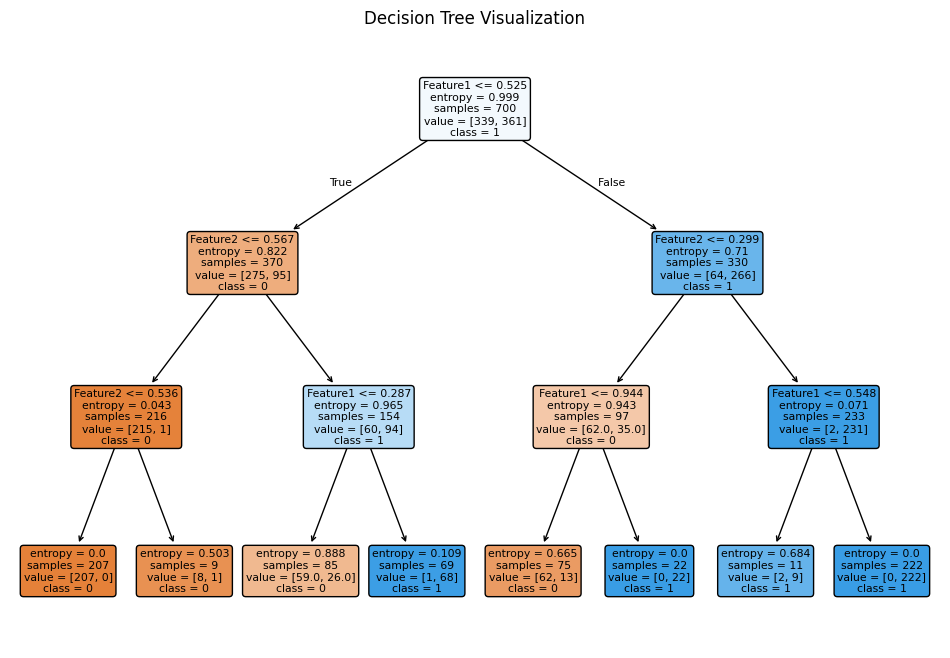

In [37]:
# 绘制决策树
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=['Feature1', 'Feature2'], class_names=['0', '1'], rounded=True)
plt.title('Decision Tree Visualization')
# plt.show()

In [51]:
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
xx

array([[0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ],
       [0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ],
       [0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ],
       ...,
       [0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ],
       [0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ],
       [0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ]])

In [54]:
print(xx.shape, xx.ravel().shape)
print(yy.shape, yy.ravel().shape)
xx.ravel()

(100, 100) (10000,)
(100, 100) (10000,)


array([0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
       1.        ])

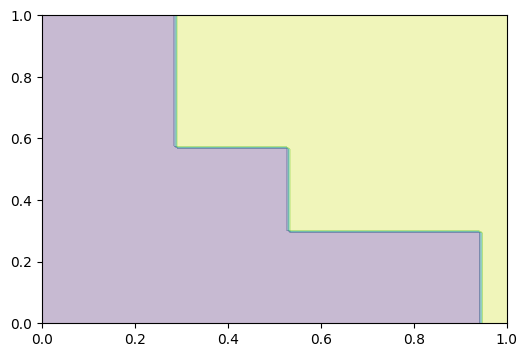

In [49]:
# 绘制数据点及决策边界
plt.figure(figsize=(6, 4))
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Decision Boundary and Data Points')
plt.colorbar()
# plt.show()

In [55]:
xx, yy = np.meshgrid(np.linspace(0, 1, 10), np.linspace(5, 6, 5))

In [56]:
xx

array([[0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]])

In [57]:
yy

array([[5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  ],
       [5.25, 5.25, 5.25, 5.25, 5.25, 5.25, 5.25, 5.25, 5.25, 5.25],
       [5.5 , 5.5 , 5.5 , 5.5 , 5.5 , 5.5 , 5.5 , 5.5 , 5.5 , 5.5 ],
       [5.75, 5.75, 5.75, 5.75, 5.75, 5.75, 5.75, 5.75, 5.75, 5.75],
       [6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.  ]])

In [58]:
# 打印准确率和分类报告
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.92
Confusion Matrix:
[[146   8]
 [ 15 131]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       154
           1       0.94      0.90      0.92       146

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

